Area under curves  0.211299547334


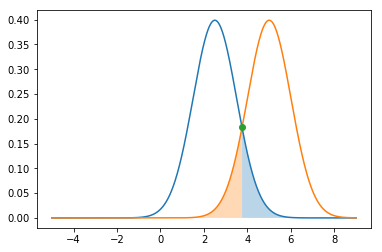

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
norm.cdf(1.96)

def solve(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])

m1 = 2.5
std1 = 1.0
m2 = 5.0
std2 = 1.0

#Get point of intersect
result = solve(m1,m2,std1,std2)

#Get point on surface
x = np.linspace(-5,9,10000)
plot1=plt.plot(x,norm.pdf(x,m1,std1))
plot2=plt.plot(x,norm.pdf(x,m2,std2))
plot3=plt.plot(result,norm.pdf(result,m1,std1),'o')

#Plots integrated area
r = result[0]
olap = plt.fill_between(x[x>r], 0, norm.pdf(x[x>r],m1,std1),alpha=0.3)
olap = plt.fill_between(x[x<r], 0, norm.pdf(x[x<r],m2,std2),alpha=0.3)

# integrate
area = norm.cdf(r,m2,std2) + (1.-norm.cdf(r,m1,std1))
print("Area under curves ", area)

plt.show()

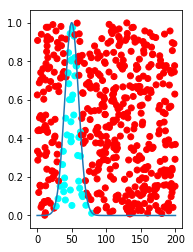

ValueError: Input must be a rank-1 array.

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from math import sqrt
from numpy import zeros
from numpy import numarray


# generate sample points
num_pts = 500
sample_xs = np.random.uniform(0, 200, size=num_pts)
sample_ys = np.random.uniform(0, 1, size=num_pts)

# define distribution
mean = 50
sigma = 10

# figure out "normalized" pdf vals at sample points
max_pdf = mlab.normpdf(mean, mean, sigma)

sample_pdf_vals = mlab.normpdf(sample_xs, mean, sigma) / max_pdf

# which ones are under the curve?
under_curve = sample_ys < sample_pdf_vals

# get pdf vals to plot
x = np.linspace(0, 200, 1000)
pdf_vals = mlab.normpdf(x, mean, sigma) / max_pdf

# plot the samples and the curve
colors = np.array(['cyan' if b else 'red' for b in under_curve])
fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(sample_xs, sample_ys, c=colors)

plt.plot(x, pdf_vals)
plt.show()
print(np.roots([sample_xs,sample_ys]))